# Sink depth and torque of a dredgebot in various soiltypes

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Latex, Math
import warnings
warnings.filterwarnings('ignore')

from AOD.Unit import ureg, Q_
from AOD.Material import *
from AOD.Model import *
from AOD.Bot import *

model = Model()

## Dimensions of a dredgebot

In [2]:
model.bot.weight_dry = 5.1e3 * ureg['kg']
model.bot.no_screw = 2
model.bot.set_buoyancy(volume=0.5 * ureg['m**3'], layers=model.world.Layers)
model.bot.v = np.arange(0., 1., step=0.1) * ureg['m/s'] # Speed of the dredgebot
model.bot.A_ref = 2. * ureg['m**2'] # Projected front plane
model.bot._C_d = 2. * ureg['dimensionless'] # Drag coef.
for s in model.bot.Screws:
    s.cylinder.d = 0.6 * ureg['m']
    s.cylinder.l = 1.92 * ureg['m']
    for h in s.Helices:
        h.p = 0.478 * ureg['m']
        h.h = 0.1 * ureg['m']

# World properties

In [3]:
model.world.T = 15.* ureg['degC']
model.world.Layers['Fluid'].v = np.array([0., -1., 0.]) * ureg['m/s']

## Sinkage depth in Silt

In [4]:
model.world.Layers['Soil'] = Silt()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3
In-situ density: 1300.0 kilogram / meter ** 3 
Cohesion: 3000.0 pascal
Adhesion: 3000.0 pascal 
int. friction angle (phi): 0.0 radian
coeff. of lateral earth pressure: 0.54 dimensionless
Poisson ratio: 0.35 dimensionless
external friction angle: 0.3490658503988659 radian


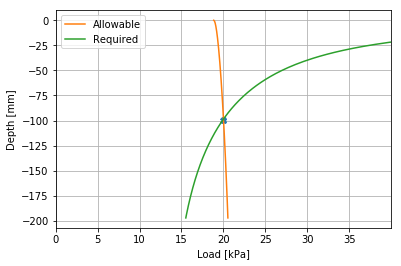

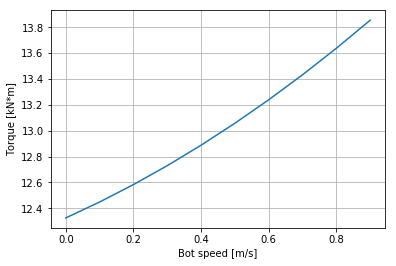

In [5]:
d_results = model.solve_sinkdepth()
t_results = model.solve_torque(d_results, TorqueSolver.RvdW)
model.print_sinkdepth(d_results)
model.print_torque(t_results, model.bot.v, 'Bot speed [m/s]')

## Sinkage depth in loosly packed clay

In [6]:
model.world.Layers['Soil'] = Loose_clay()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3
In-situ density: 1400.0 kilogram / meter ** 3 
Cohesion: 5000.0 pascal
Adhesion: 5000.0 pascal 
int. friction angle (phi): 0.0 radian
coeff. of lateral earth pressure: 0.75 dimensionless
Poisson ratio: 0.2 dimensionless
external friction angle: 0.3490658503988659 radian


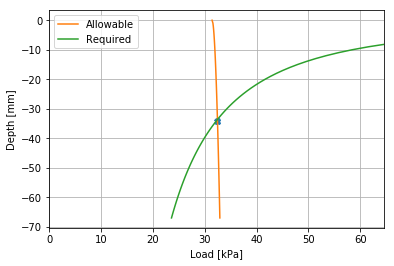

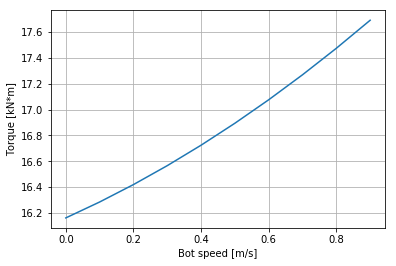

In [7]:
d_results = model.solve_sinkdepth()
t_results = model.solve_torque(d_results, TorqueSolver.RvdW)
model.print_sinkdepth(d_results)
model.print_torque(t_results, model.bot.v, 'Bot speed [m/s]')

## Sinkage depth in packed clay

In [8]:
model.world.Layers['Soil'] = Packed_clay()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3
In-situ density: 1800.0 kilogram / meter ** 3 
Cohesion: 10000.0 pascal
Adhesion: 10000.0 pascal 
int. friction angle (phi): 0.0 radian
coeff. of lateral earth pressure: 1.0 dimensionless
Poisson ratio: 0.2 dimensionless
external friction angle: 0.3490658503988659 radian


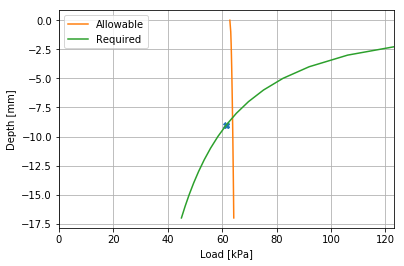

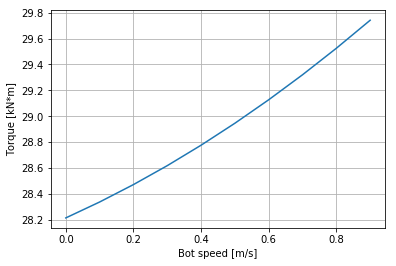

In [9]:
d_results = model.solve_sinkdepth()
t_results = model.solve_torque(d_results, TorqueSolver.RvdW)
model.print_sinkdepth(d_results)
model.print_torque(t_results, model.bot.v, 'Bot speed [m/s]')

## Sinkage depth in Sand

In [10]:
model.world.Layers['Soil'] = Sand()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3
In-situ density: 2000.0 kilogram / meter ** 3 
Cohesion: 0.0 pascal
Adhesion: 3000.0 pascal 
int. friction angle (phi): 0.6108652381980153 radian
coeff. of lateral earth pressure: 0.0 dimensionless
Poisson ratio: 0.2 dimensionless
external friction angle: 0.2036217460660051 radian


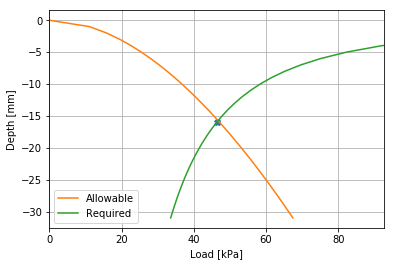

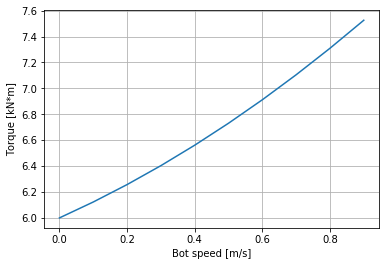

In [11]:
d_results = model.solve_sinkdepth()
t_results = model.solve_torque(d_results, TorqueSolver.RvdW)
model.print_sinkdepth(d_results)
model.print_torque(t_results, model.bot.v, 'Bot speed [m/s]')